## Números aleatorios

[1015568748, 1586005467, 2165703038, 3027450565, 217083232, 1587069247, 3327581586, 2388811721, 70837908, 2745540835]


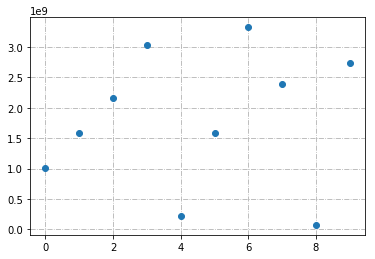

In [3]:
import random as rd
from pylab import*
N=10
a=1664525     #Al hacer el proceso con c=1, a=4 y m=9, se genera un tipo de repetición coordinada, esto se nota
c=1013904223  #mucho más al colocar valores de a=8 y c=20 se obtiene el mismo numero (1).
m=4294967296
x=1
n_alt=[]

for i in range(N):
    x=((a*x)+c)%m  #No es confiable para generar numeros totalmente aleatorios pues genera un patrón que no debería.
    n_alt.append(x)
print(n_alt)
plot(n_alt,'o')
grid('on',ls='-.')
show()

In [39]:
#El generador random tiemne una semilla que permite reproducir la secuencia. Aquí no hay semilla
[print(rd.random()) for i in range(10)]

0.7141294836112025
0.9210986675838745
0.3949634040007439
0.8009087709852283
0.44462105605076063
0.9355867217045211
0.8788666603380416
0.09745430973087721
0.1359688602006689
0.21698694123313733


[None, None, None, None, None, None, None, None, None, None]

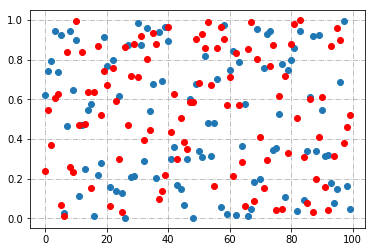

In [47]:
N=100
rd.seed(5) #Semilla. No correlaciona los numeros, simplemente imprime los originales nuevamente.
num_alt=[]
for i in range(N):
    num_alt.append(rd.random())
#print(num_alt)
#plot(num_alt,'o')  Si lo quito el comentario me genra dos gráficas distintas.
#grid('on',ls='-.')
#show()

#Otra forma de hacer la lista
rd.seed(3)
l=[rd.random() for i in range(N)]
#print('\n',l)
plot(num_alt,'o')
plot(l,'ro')
grid('on',ls='-.')
show()

# Probabilidad en un dado

In [225]:
M=100000
m=1
n=7
dado=[]
Prob=0
#[print(rd.randrange(m,n)) for i in range(M)]
cont=[0 for i in range(6)]
cont1=[0 for i in range(6)]
for j in range(M):
    dado.append(rd.randrange(m,n))
#print(dado)
for k in dado:
    cont[k-1]+=1
    cont1[k-1]+=1
[print('P[',i,']=',cont[k-1]/M) for i in range(1,7)]
print('\nCon dos dados, la probabilidad de tener en dos caras un mismo número es: ')
[print('P[',i,']=',(cont[k-1]/M)*(cont1[k-1]/M)) for i in range(1,7)]




P[ 1 ]= 0.16702
P[ 2 ]= 0.16702
P[ 3 ]= 0.16702
P[ 4 ]= 0.16702
P[ 5 ]= 0.16702
P[ 6 ]= 0.16702

Con dos dados, la probabilidad de tener en dos caras un mismo número es: 
P[ 1 ]= 0.0278956804
P[ 2 ]= 0.0278956804
P[ 3 ]= 0.0278956804
P[ 4 ]= 0.0278956804
P[ 5 ]= 0.0278956804
P[ 6 ]= 0.0278956804


[None, None, None, None, None, None]

In [226]:
#En la teoría esta probabilidad es igual a 1/6=0.1666
caras=[0 for i in range(6)]
#print(rd.randrange(6))
#print(caras)
for j in range(100000):
    caras[rd.randrange(6)]+=1
[print('P[',i,']=',caras[i]/100000) for i in range(6)]

print('\nCon dos dados, la probabilidad de tener en dos caras un mismo número es: ')
#En la teoría esta probabilidad es igual a 1/36=0.0277
caras=[0 for i in range(6)]
caras1=[0 for j in range(6)]
#print(rd.randrange(6))
#print(caras)
for j in range(100000):
    caras[rd.randrange(6)]+=1
    caras1[rd.randrange(6)]+=1
[print('P[',i,']=',(caras[i]/100000)*(caras1[i]/100000)) for i in range(6)]

P[ 0 ]= 0.16587
P[ 1 ]= 0.16746
P[ 2 ]= 0.16722
P[ 3 ]= 0.16676
P[ 4 ]= 0.1675
P[ 5 ]= 0.16519

Con dos dados, la probabilidad de tener en dos caras un mismo número es: 
P[ 0 ]= 0.0282070581
P[ 1 ]= 0.0281817706
P[ 2 ]= 0.0270848604
P[ 3 ]= 0.0275309866
P[ 4 ]= 0.027748888300000003
P[ 5 ]= 0.0279199908


[None, None, None, None, None, None]

# Ejemplo 10.1. Decaimiento de un isótopo

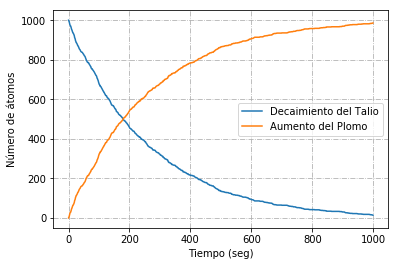

In [4]:
from random import random
from numpy import arange

#CONSTANTES
Nt=1000           #Átomos de Talio
Np=0              #Átomos de Plomo
v_t=3.053*60      #Vida media del Talio en segundos
t=1.0             #Paso temporal en segundos
p=1-(2**(-t/v_t)) #Probabilidad de decaimiento
t_max=1000        #Tiempo total

#GRÁFICA
punt_t=arange(0.0,t_max,t)
T=[]   #Talio
P=[]   #Plomo


for i in punt_t:
    T.append(Nt)
    P.append(Np)
    
    #Calculando el número de átomos que decaen
    d=0
    for j in range(Nt):
        if random()<p:
            d+=1
    Nt-=d
    Np+=d
        
plot(punt_t,T,label='Decaimiento del Talio')
plot(punt_t,P,label='Aumento del Plomo')
xlabel('Tiempo (seg)')
ylabel('Número de átomos')
grid('on',ls='-.')
legend()
show()


# Ejercicio 10.2. Cadena radiactiva de decaimiento

Este ejercicio analiza una versión más avanzada de la simple simulación de decaimiento radiactivo del ejemplo 10.1.

El isótopo 213Bi decae a un átomo estable de 209Bi a través de una de dos rutas diferentes, con probabilidades y vidas medias como se muestran en la figura. (Técnicamente, el 209Bi no es realmente estable, pero tiene una vida media de más de $10^{19}$ años, mil millones de veces la edad del universo, por lo que bien podría serlo).

Comenzando con una muestra que consta de 10000 átomos de 213Bi, simule la descomposición de los átomos como en el Ejemplo 10.1 dividiendo el tiempo en rebanadas de longitud dt = 1s cada una y en cada paso haciendo lo siguiente:

* a) Para cada átomo de 209Pb a su vez, decida al azar, con la probabilidad apropiada, si decae o no. (La probabilidad se puede calcular a partir de la ecuación (10.3).) Cuente el número total que decae, reste del número de átomos de 209Pb y súmelo al número de átomos de 209Bi.

* b) Ahora haga lo mismo para 209Tl, excepto que los átomos en decaimiento se restan del total de 209Tl y se suman al total de 209 Pb.

* c) Para 213Bi, la situación es más complicada: cuando un átomo de 213Bi decae, debe decidir al azar con la probabilidad apropiada la ruta por la cual se descompone. Cuente los números que decaen por cada ruta y sume y reste en consecuencia.

**Tenga en cuenta que tiene que trabajar la cadena desde la parte inferior, no hacia abajo desde la parte superior, para evitar que el mismo átomo se descomponga dos veces en un solo paso.**

Mantenga un registro de la cantidad de átomos de cada uno de los cuatro isótopos en todo momento durante 20000 segundos y haga un solo gráfico que muestre los cuatro números en función del tiempo en los mismos ejes.

<img src="img.png">

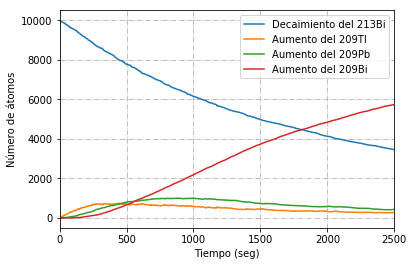

In [11]:
from random import random
from numpy import arange
from pylab import*
#CONSTANTES
NBi=10000           #Átomos de 213Bi
Np=0                #Átomos de Plomo
Nt=0                #Átomos de talio
Nbi=0               #Átomos de 209Bi
v_Bi=46*60          #Vida media del 213Bi en segundos
v_tl=2.2*60         #Vida media del 209Tl en segundos
v_p=3.3*60          #Vida media del 209Pb en segundos
t=1.0               #Paso temporal en segundos
p=1-(2**(-t/v_Bi))  #Probabilidad de decaimiento 213Bi
pt=1-(2**(-t/v_tl)) #Probabilidad de decaimiento 209Tl
pp=1-(2**(-t/v_p))  #Probabilidad de decaimiento 209Pb
t_max=20000         #Tiempo total

#GRÁFICA
punt_t=arange(0.0,t_max,t)
Bi=[]  #213Bi
bi=[]  #209Bi
T=[]   #Talio
P=[]   #Plomo

for i in punt_t:
    Bi.append(NBi)
    T.append(Nt)
    P.append(Np)
    bi.append(Nbi)

    #Calculando el número de átomos que decaen
    d=0
    for j in range(Np):
        if random()<pp:   #Cuente el número total que decae, reste del número de átomos de 209Pb 
            d+=1          #y súmelo al número de átomos de 209Bi.
    #NBi-=d
    Np-=d
    Nbi+=d
    
    de=0
    for k in range(Nt):
        if random()<pt:   #los átomos en decaimiento se restan del total de 209Tl y se suman al total de 209 Pb.
            de+=1
    #NBi-=de
    Nt-=de
    Np+=de
    
    de1=0
    de2=0
    de3=0
    for l in range(NBi):
        if random()<p:          #Cuente los números que decaen por cada ruta (Tl o Pb) y sume y reste en consecuencia.
            de1+=1
            NBi-=de1            #Restar al 213Bi
            if random()>0.0209: #Si el numero ramdon es mayor que el 2% se va para el plomo
                de2+=1
                Nt+=de2         #Sumar un porcentaje de átomos al talio (2.09%)
            else:
                if random()<0.9791:
                    de3+=1
                    Np+=de3     #Sumar un porcentaje de átomos al plomo (97.91%)
    
#Gráfica con 213Bi, 209Tl, 209Pb y 2019Bi
plot(punt_t,Bi,label='Decaimiento del 213Bi')    
plot(punt_t,T,label='Aum-Dec del 209Tl')
plot(punt_t,P,label='Aum-Dec del 209Pb')
plot(punt_t,bi,label='Aumento del 209Bi')
xlabel('Tiempo (seg)')
ylabel('Número de átomos')
xlim(0,2500)
grid('on',ls='-.')
legend()
show()

La cantidad de átomos para el 209Tl en 613seg es =  740
La cantidad de átomos para el 209Pb en 1000seg es =  1000


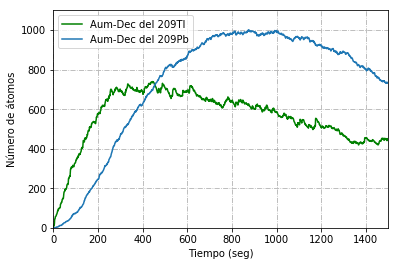

In [48]:
print('La cantidad de átomos para el 209Tl en 613seg es = ',max(T))
print('La cantidad de átomos para el 209Pb en 1000seg es = ',max(P))
#plot(punt_t,Bi,label='Decaimiento del 213Bi')    
plot(punt_t,T,label='Aum-Dec del 209Tl',color='g')
plot(punt_t,P,label='Aum-Dec del 209Pb')
#plot(punt_t,bi,label='Aumento del 209Bi')
xlabel('Tiempo (seg)')
ylabel('Número de átomos')
xlim(0,1500)
ylim(0,1100)
grid('on',ls='-.')
legend()
show()


Realizando un análisis del ejercicio, se puede notar claramente en la gráfica anterior que las cantidades atómicas iniciales correponden a las ingresadas, donde solo se cuenta con una cantidad significante para el isótopo de Bismuto 213; a partir de éste valor y al empezar el isótopo a decaer, aumentan el Plomo 209 y el Talio 209, viéndose que uno en mayor amplitud que el otro, debido al porcentaje de probabilidad que tiene el 213Bi de decaer por una ruta u otra, siendo estas de 2.09% y 97.91%, para el Talio y Plomo respectivamente; como consecuencia el decaimiento del Talio es más rápido que el de Plomo.
En este orden de ideas, se puede observar que para el caso del 209Pb, este aumenta hasta 1000seg, con un valor máximo de 740 átomos, pues a partir de aquí empieza a decaer, convirtiéndose en 209Bi. Para el caso del 209Tl, el aumento se da hasta los 613seg, con un valor de 1000 átomos, donde empieza a decaer para convertirse también en 209Bi.